In [ ]:
# pip intall tensorflow
# pip install numpy
# pip install matplotlib
# pip install seaborn

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [19]:
df  = pd.read_csv('df_mangabeiras.csv', sep=';')
df.head()

,area,condominio,preco
0,33,300,235000
1,33,500,320000
2,35,200,270000
3,36,300,330000
4,36,200,2000000


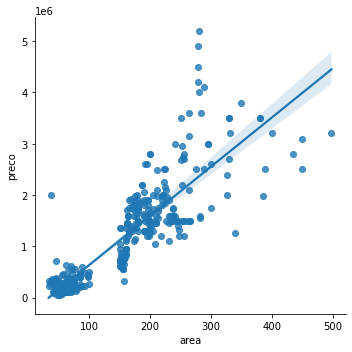

In [20]:
sns.lmplot(x='area', y='preco', data=df)

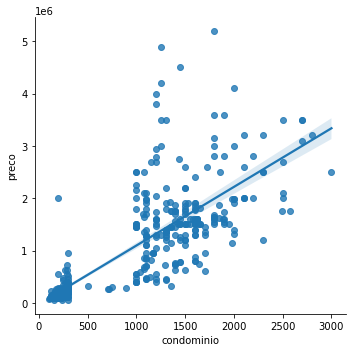

In [21]:
sns.lmplot(x='condominio', y='preco', data=df)

In [22]:
x_df = df.drop('preco', axis=1)
y_df = df['preco']
x_df

,area,condominio
0,33,300
1,33,500
2,35,200
3,36,300
4,36,200
...,...,...
465,400,2800
466,434,2200
467,450,3000
468,450,2700


In [23]:
x = x_df.to_numpy()
y = y_df.to_numpy()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

In [25]:
model = Sequential()
model.add(Dense(2, input_dim = 2, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tabnanny import verbose


history = model.fit(X_train, y_train, verbose=1, epochs=2000, validation_data=(X_test, y_test))

Epoch 1/2000
11/11 [==============================] - 1s 29ms/step - loss: 1742480998400.0000 - val_loss: 2029099155456.0000
Epoch 2/2000
11/11 [==============================] - 0s 8ms/step - loss: 1742434598912.0000 - val_loss: 2029048430592.0000
Epoch 3/2000
11/11 [==============================] - 0s 7ms/step - loss: 1742388854784.0000 - val_loss: 2028998623232.0000
Epoch 4/2000
11/11 [==============================] - 0s 7ms/step - loss: 1742346387456.0000 - val_loss: 2028949602304.0000
Epoch 5/2000
11/11 [==============================] - 0s 7ms/step - loss: 1742302740480.0000 - val_loss: 2028901367808.0000
Epoch 6/2000
11/11 [==============================] - 0s 7ms/step - loss: 1742259486720.0000 - val_loss: 2028853264384.0000
Epoch 7/2000
11/11 [==============================] - 0s 7ms/step - loss: 1742217543680.0000 - val_loss: 2028807127040.0000
Epoch 8/2000
11/11 [==============================] - 0s 7ms/step - loss: 1742176649216.0000 - val_loss: 2028761907200.0000
Epoch 9

In [27]:
prediction_test = model.predict(X_test)
y_test, prediction_test

5/5 [==============================] - 0s 2ms/step


(55      120000
 73      160000
 33      145000
 446    3600000
 425    1500000
         ...   
 60      139900
 110     275000
 299    1900000
 316    1990000
 29      115000
 Name: preco, Length: 141, dtype: int64,
 array([[ 161936.11 ],
        [ 143339.55 ],
        [ 159312.45 ],
        [1156859.1  ],
        [1008548.5  ],
        [ 146783.81 ],
        [ 121908.5  ],
        [ 107328.38 ],
        [ 845657.56 ],
        [ 132724.4  ],
        [ 186320.81 ],
        [ 783246.56 ],
        [1129731.6  ],
        [ 929976.4  ],
        [1605417.8  ],
        [1137071.9  ],
        [ 170818.45 ],
        [ 160303.69 ],
        [ 999525.6  ],
        [ 156598.42 ],
        [ 176947.88 ],
        [1694943.9  ],
        [ 139173.8  ],
        [ 741030.75 ],
        [ 175184.95 ],
        [ 159071.53 ],
        [ 914894.3  ],
        [ 185800.1  ],
        [ 140735.95 ],
        [ 161765.45 ],
        [ 124712.87 ],
        [ 628630.75 ],
        [ 187362.27 ],
        [ 927002.6  ],
 

In [28]:
# print(np.mean(prediction_test - y_test))

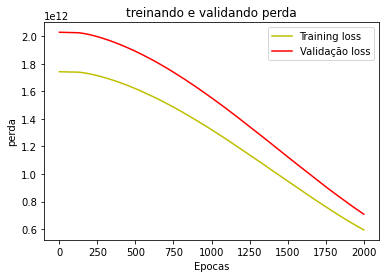

In [29]:
from cProfile import label


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validação loss')
plt.title('treinando e validando perda')
plt.xlabel('Epocas')
plt.ylabel('perda')
plt.legend()
plt.show()

In [30]:
for layer_depth, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f'______________ Layer {layer_depth}____________')
    for toNeuronNum, bias in enumerate(biases):
        print(f'Bias to Layes {layer_depth+1} Neuron {toNeuronNum}: {bias}')
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'Layer {layer_depth}, Neuron {fromNeuronNum} to Layer {layer_depth+1}, Neuron{toNeuronNum} = {wgt2}')

______________ Layer 0____________
Bias to Layes 1 Neuron 0: 0.0
Bias to Layes 1 Neuron 1: 22.73893928527832
Layer 0, Neuron 0 to Layer 1, Neuron0 = 0.36219334602355957
Layer 0, Neuron 0 to Layer 1, Neuron1 = 22.931974411010742
Layer 0, Neuron 1 to Layer 1, Neuron0 = -1.063982367515564
Layer 0, Neuron 1 to Layer 1, Neuron1 = 23.374052047729492
______________ Layer 1____________
Bias to Layes 2 Neuron 0: 20.783994674682617
Layer 1, Neuron 0 to Layer 2, Neuron0 = -1.0872366428375244
Layer 1, Neuron 1 to Layer 2, Neuron0 = 22.707096099853516


In [31]:
x0 = 165
x1 = 1530
# 1700000

In [32]:
hidden0 = max(0, ((x0*20.663421630859375)+(x1*21.274261474609375)+(20.698856353759766)))
hidden1 = max(0, ((x0*20.630306243896484)+(x1*21.345911026000977)+(20.425968170166016)))

output = max(0,((hidden0*21.40823745727539)+(hidden1*21.671785354614258)+(18.069671630859375)))
output

1552279.377133201